# Cálculo de la frecuencia cardiaca a partir de datos crudos

## Funcionamiento de un pulsioximetro comercial

Un pulsioxímetro comercial calcula la frecuencia cardíaca (HR) midiendo los cambios en la absorción de luz a través de un tejido, generalmente un dedo o el lóbulo de la oreja. Aquí te explico el proceso paso a paso:

### 1. Emisión de Luz y Captura de Señal
El pulsioxímetro emite dos longitudes de onda de luz: infrarroja (IR) y roja (RED).

Un fotodiodo detecta cuánta luz pasa a través del tejido y cuánto es absorbido.

La absorción de luz varía con el flujo sanguíneo, ya que la sangre arterial cambia de volumen con cada latido.

### 2. Obtención de la Señal Pulsátil
La señal detectada tiene dos componentes:

- Componente de corriente continua (DC): Absorción constante (tejido, sangre venosa, hueso).

- Componente alterno (AC): Absorción pulsátil, debido a los cambios en el flujo arterial con cada latido.

El componente AC de la señal es el que se usa para calcular la frecuencia cardíaca, porque representa los picos de cada latido.

### 3. Detección de Picos para Calcular HR
Se filtra la señal para eliminar ruido y obtener solo la componente pulsátil.

Se detectan los picos de la onda (cada pico representa un latido).

Se mide el tiempo entre picos sucesivos (intervalo entre latidos, RR interval).

La frecuencia cardíaca se calcula con:

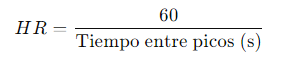
 
Por ejemplo, si el tiempo entre dos picos es 0.8 segundos:

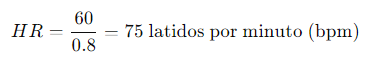

#### 4. Procesamiento Digital
Los pulsioxímetros comerciales aplican filtros y algoritmos para mejorar la detección:
- Filtro pasa-bajos: Elimina ruido de alta frecuencia (movimientos, interferencias).
- Filtro pasa-altos: Elimina la señal DC (absorción constante).
- Algoritmo de detección de picos: Encuentra los picos más relevantes y descarta falsos positivos.

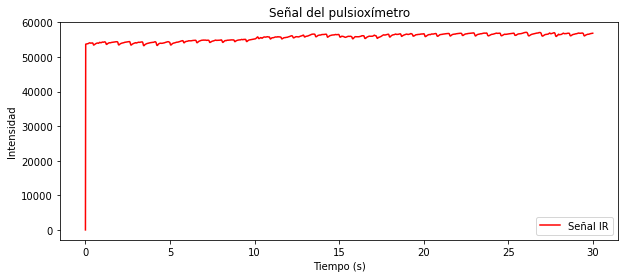

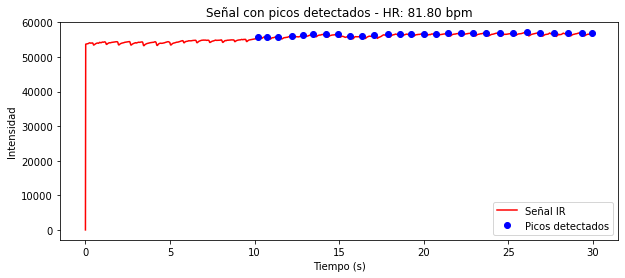

Frecuencia Cardíaca Estimada: 81.80 bpm


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Cargar los datos del CSV
file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_95_77_2.csv"
df = pd.read_csv(file_path, delimiter=";")

# Extraer tiempo e intensidad de la señal IR (o RED)
tiempo = df['Tiempo (ms)'] / 1000  # Convertir a segundos
senal_ir = df['IR']  # Puedes cambiar a 'RED' si prefieres

#  Visualizar la señal para ver su forma
plt.figure(figsize=(10,4))
plt.plot(tiempo, senal_ir, label="Señal IR", color='r')
plt.xlabel("Tiempo (s)")
plt.ylabel("Intensidad")
plt.title("Señal del pulsioxímetro")
plt.legend()
plt.show()

#  Detectar los picos de la señal
picos, _ = find_peaks(senal_ir, distance=30, height=np.mean(senal_ir))  # Ajusta "distance" según tu señal

# Calcular la HR a partir del tiempo entre picos
tiempos_entre_picos = np.diff(tiempo[picos])  # Diferencia de tiempo entre picos
frecuencia_cardiaca = 60 / np.mean(tiempos_entre_picos)  # HR en latidos por minuto

#  Mostrar resultados
plt.figure(figsize=(10,4))
plt.plot(tiempo, senal_ir, label="Señal IR", color='r')
plt.plot(tiempo[picos], senal_ir[picos], "bo", label="Picos detectados")  # Marcar los picos
plt.xlabel("Tiempo (s)")
plt.ylabel("Intensidad")
plt.title(f"Señal con picos detectados - HR: {frecuencia_cardiaca:.2f} bpm")
plt.legend()
plt.show()

print(f"Frecuencia Cardíaca Estimada: {frecuencia_cardiaca:.2f} bpm")


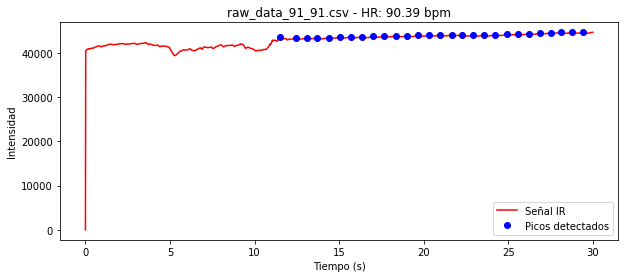

Archivo: raw_data_91_91.csv
Frecuencia Cardíaca Estimada: 90.39 bpm



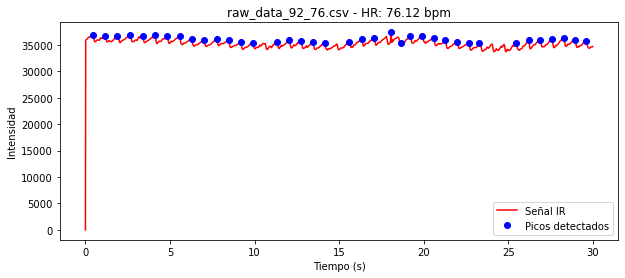

Archivo: raw_data_92_76.csv
Frecuencia Cardíaca Estimada: 76.12 bpm



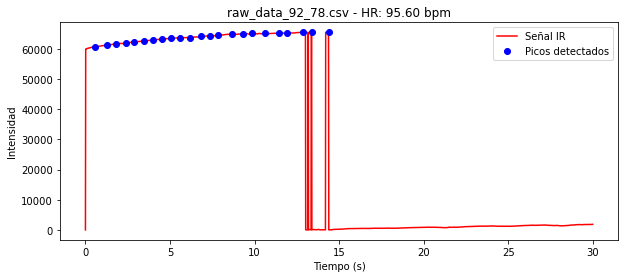

Archivo: raw_data_92_78.csv
Frecuencia Cardíaca Estimada: 95.60 bpm



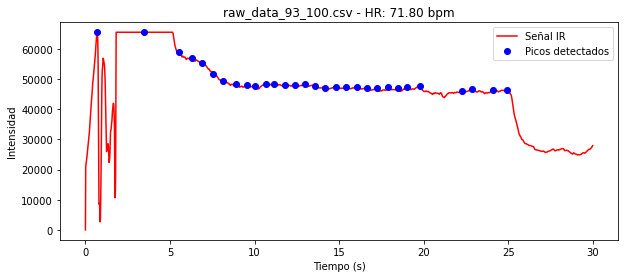

Archivo: raw_data_93_100.csv
Frecuencia Cardíaca Estimada: 71.80 bpm



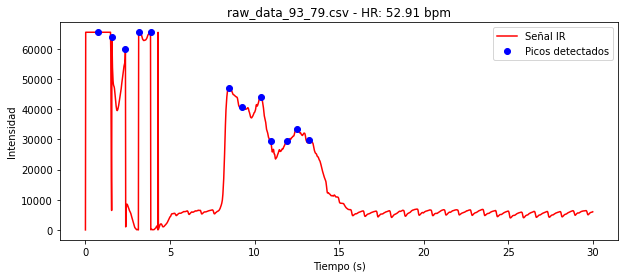

Archivo: raw_data_93_79.csv
Frecuencia Cardíaca Estimada: 52.91 bpm



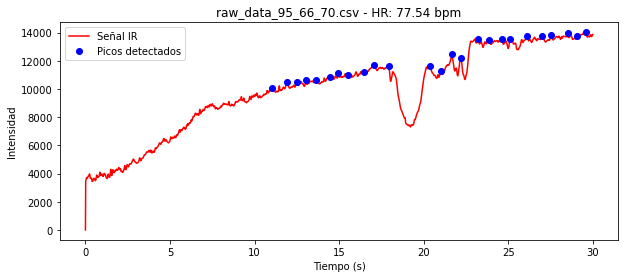

Archivo: raw_data_95_66_70.csv
Frecuencia Cardíaca Estimada: 77.54 bpm



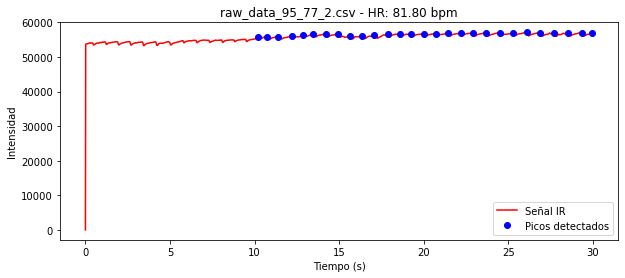

Archivo: raw_data_95_77_2.csv
Frecuencia Cardíaca Estimada: 81.80 bpm



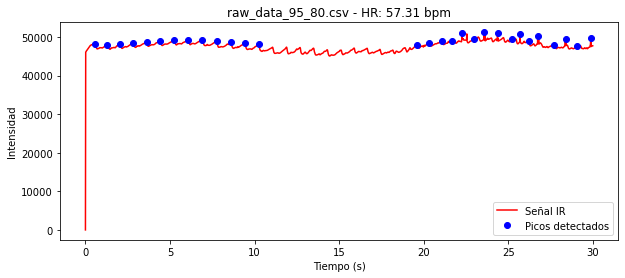

Archivo: raw_data_95_80.csv
Frecuencia Cardíaca Estimada: 57.31 bpm



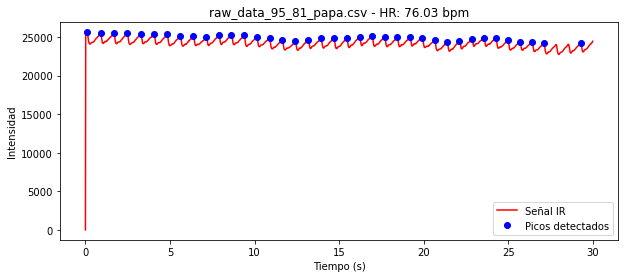

Archivo: raw_data_95_81_papa.csv
Frecuencia Cardíaca Estimada: 76.03 bpm



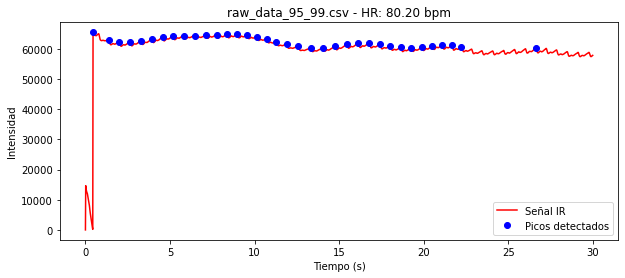

Archivo: raw_data_95_99.csv
Frecuencia Cardíaca Estimada: 80.20 bpm



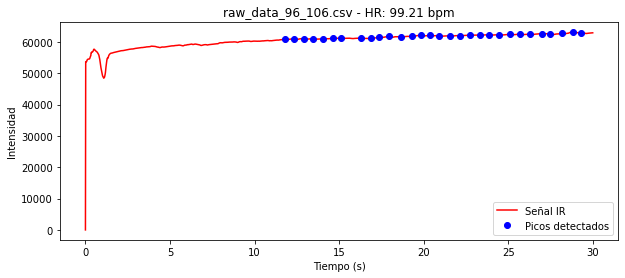

Archivo: raw_data_96_106.csv
Frecuencia Cardíaca Estimada: 99.21 bpm



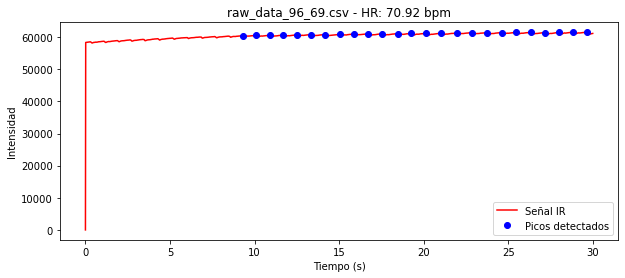

Archivo: raw_data_96_69.csv
Frecuencia Cardíaca Estimada: 70.92 bpm



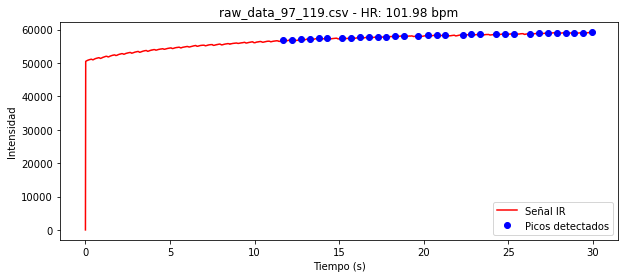

Archivo: raw_data_97_119.csv
Frecuencia Cardíaca Estimada: 101.98 bpm



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

# Definir la ruta de la carpeta con los CSV
carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"

# Procesar cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):  # Asegurar que es un CSV
        ruta_csv = os.path.join(carpeta, archivo)
        
        # Cargar los datos
        df = pd.read_csv(ruta_csv, delimiter=";")
        tiempo = df['Tiempo (ms)'] / 1000  # Convertir a segundos
        senal_ir = df['IR']  # Puedes cambiar a 'RED' si prefieres

        #  Detectar picos en la señal
        picos, _ = find_peaks(senal_ir, distance=30, height=np.mean(senal_ir))  
        
        if len(picos) > 1:  # Solo calcular si hay más de un pico
            tiempos_entre_picos = np.diff(tiempo[picos])  # Intervalos entre picos
            frecuencia_cardiaca = 60 / np.mean(tiempos_entre_picos)  # HR en bpm
        else:
            frecuencia_cardiaca = np.nan  # Si no hay suficientes picos, dejar vacío

        #  Graficar señal con picos detectados
        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, senal_ir, label="Señal IR", color='r')
        plt.plot(tiempo[picos], senal_ir[picos], "bo", label="Picos detectados")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad")
        plt.title(f"{archivo} - HR: {frecuencia_cardiaca:.2f} bpm" if not np.isnan(frecuencia_cardiaca) else f"{archivo} - No se detectaron picos")
        plt.legend()
        plt.show()

        # Imprimir el resultado después de la gráfica
        if not np.isnan(frecuencia_cardiaca):
            print(f"Archivo: {archivo}")
            print(f"Frecuencia Cardíaca Estimada: {frecuencia_cardiaca:.2f} bpm\n")
        else:
            print(f"Archivo: {archivo}")
            print(" No se detectaron suficientes picos para calcular la HR.\n")


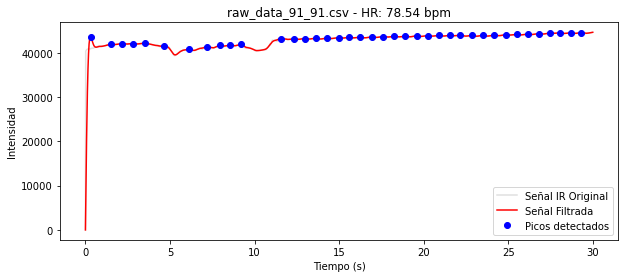

 Archivo: raw_data_91_91.csv
Frecuencia Cardíaca Estimada: 78.54 bpm



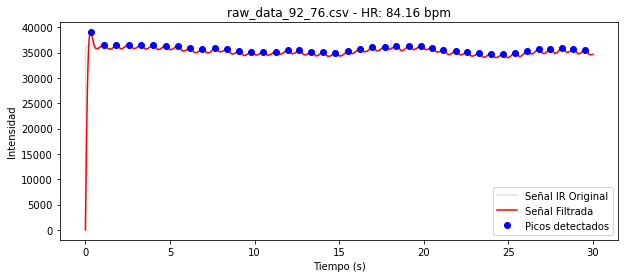

 Archivo: raw_data_92_76.csv
Frecuencia Cardíaca Estimada: 84.16 bpm



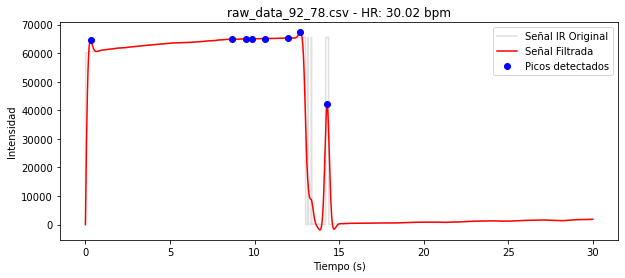

 Archivo: raw_data_92_78.csv
Frecuencia Cardíaca Estimada: 30.02 bpm



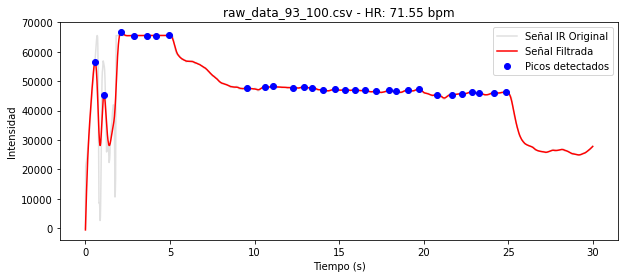

 Archivo: raw_data_93_100.csv
Frecuencia Cardíaca Estimada: 71.55 bpm



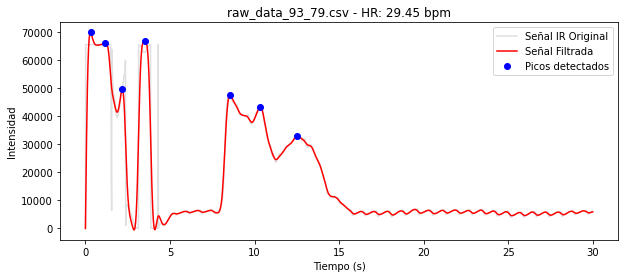

 Archivo: raw_data_93_79.csv
Frecuencia Cardíaca Estimada: 29.45 bpm



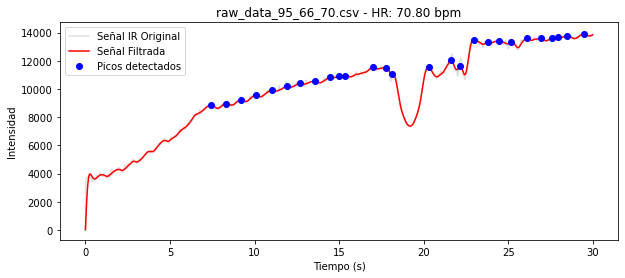

 Archivo: raw_data_95_66_70.csv
Frecuencia Cardíaca Estimada: 70.80 bpm



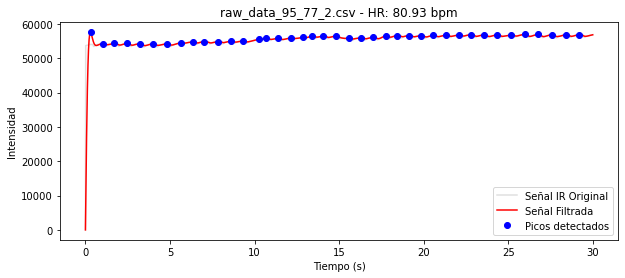

 Archivo: raw_data_95_77_2.csv
Frecuencia Cardíaca Estimada: 80.93 bpm



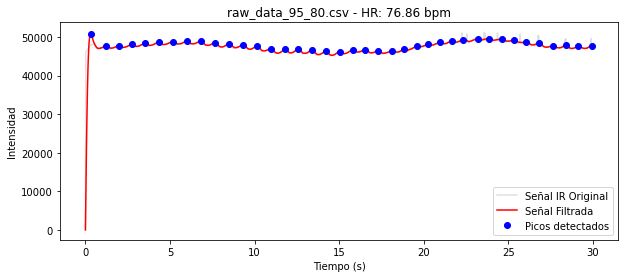

 Archivo: raw_data_95_80.csv
Frecuencia Cardíaca Estimada: 76.86 bpm



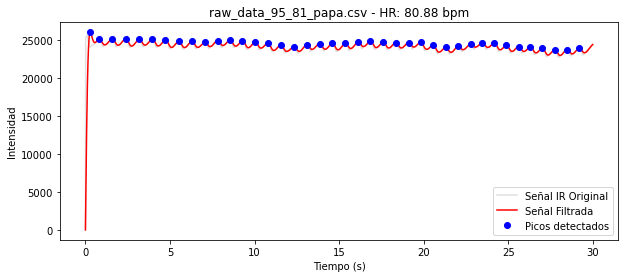

 Archivo: raw_data_95_81_papa.csv
Frecuencia Cardíaca Estimada: 80.88 bpm



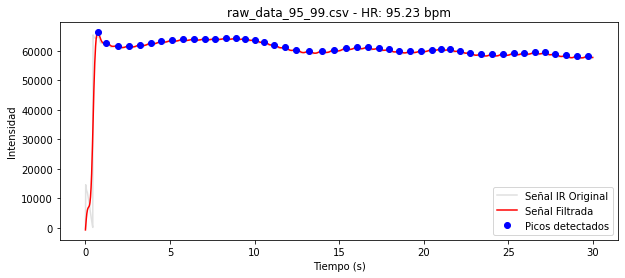

 Archivo: raw_data_95_99.csv
Frecuencia Cardíaca Estimada: 95.23 bpm



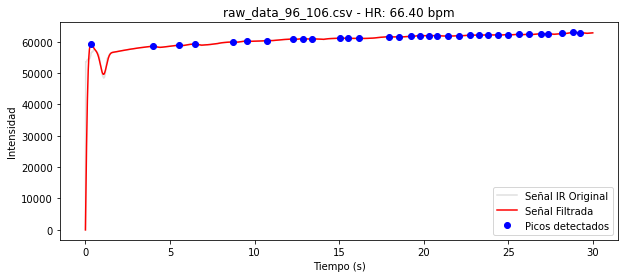

 Archivo: raw_data_96_106.csv
Frecuencia Cardíaca Estimada: 66.40 bpm



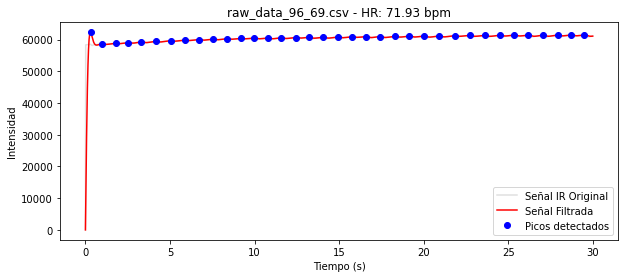

 Archivo: raw_data_96_69.csv
Frecuencia Cardíaca Estimada: 71.93 bpm



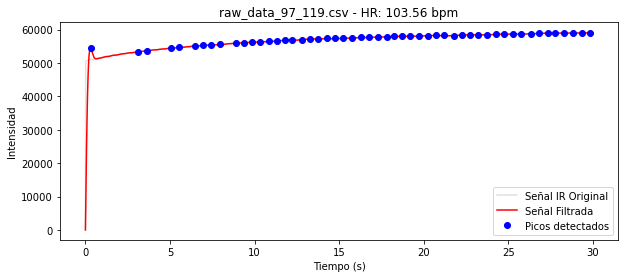

 Archivo: raw_data_97_119.csv
Frecuencia Cardíaca Estimada: 103.56 bpm



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks, butter, filtfilt

# Función mejorada para filtrar la señal sin perder demasiada información
def filtrar_senal(senal, fs=100, fc=3.0, orden=2):  # 🔹 Subimos la frecuencia de corte y bajamos el orden
    nyquist = 0.5 * fs
    normal_fc = fc / nyquist
    b, a = butter(orden, normal_fc, btype='low', analog=False)
    return filtfilt(b, a, senal)

# Ruta de la carpeta con los CSV
carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"

# Procesar cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):
        ruta_csv = os.path.join(carpeta, archivo)
        
        # Cargar los datos
        df = pd.read_csv(ruta_csv, delimiter=";")
        tiempo = df['Tiempo (ms)'] / 1000  # Convertir a segundos
        senal_ir = df['IR']  

        # Filtrar la señal con el nuevo filtro mejorado
        senal_filtrada = filtrar_senal(senal_ir)

        # Detectar picos con menor distancia mínima (20 en vez de 30)
        picos, _ = find_peaks(senal_filtrada, distance=20, height=np.mean(senal_filtrada) * 0.8)  
        
        if len(picos) > 1:  
            tiempos_entre_picos = np.diff(tiempo[picos])  
            frecuencia_cardiaca = 60 / np.mean(tiempos_entre_picos)  
        else:
            frecuencia_cardiaca = np.nan  

        # Graficar señal original y filtrada con picos detectados
        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, senal_ir, label="Señal IR Original", color='lightgray', alpha=0.7)
        plt.plot(tiempo, senal_filtrada, label="Señal Filtrada", color='r')
        plt.plot(tiempo[picos], senal_filtrada[picos], "bo", label="Picos detectados")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad")
        plt.title(f"{archivo} - HR: {frecuencia_cardiaca:.2f} bpm" if not np.isnan(frecuencia_cardiaca) else f"{archivo} - No se detectaron picos")
        plt.legend()
        plt.show()

        # Imprimir el resultado después de la gráfica
        if not np.isnan(frecuencia_cardiaca):
            print(f" Archivo: {archivo}")
            print(f"Frecuencia Cardíaca Estimada: {frecuencia_cardiaca:.2f} bpm\n")
        else:
            print(f"Archivo: {archivo}")
            print(" No se detectaron suficientes picos para calcular la HR.\n")


Los errores no son completamente aleatorios, pero sí hay una tendencia a subestimar las frecuencias más altas y sobreestimar algunas más bajas.

1. Puede que aún se pierdan algunos picos reales
-  Ajustar height en find_peaks() de manera dinámica, en lugar de usar un umbral fijo.
- Prueba: Ajustar height=np.percentile(senal_filtrada, 75).

2. Ruido que afecta la detección de intervalos RR
-  Usar un filtro más refinado con un enfoque de suavizado adaptativo.

3. Latidos irregulares o cambios en la amplitud
- Excluir outliers en los intervalos RR para evitar errores en la media.
- Prueba: Aplicar un filtro IQR (Interquartile Range) en los RR-intervals.

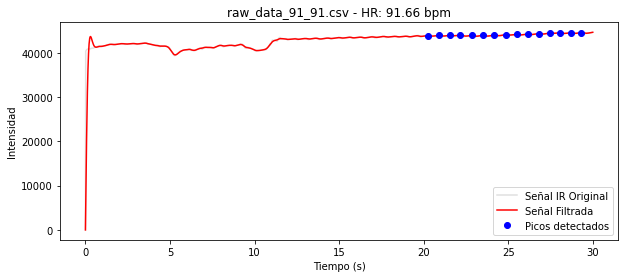

 Archivo: raw_data_91_91.csv
 Frecuencia Cardíaca Estimada: 91.66 bpm



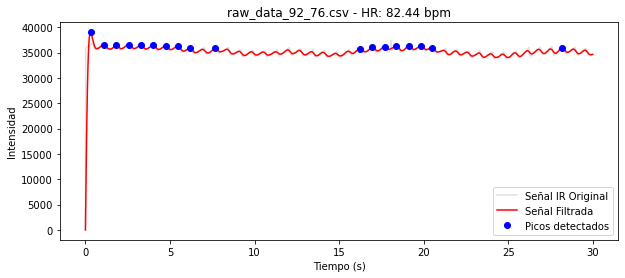

 Archivo: raw_data_92_76.csv
 Frecuencia Cardíaca Estimada: 82.44 bpm



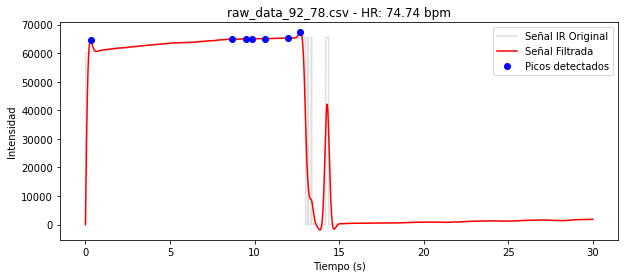

 Archivo: raw_data_92_78.csv
 Frecuencia Cardíaca Estimada: 74.74 bpm



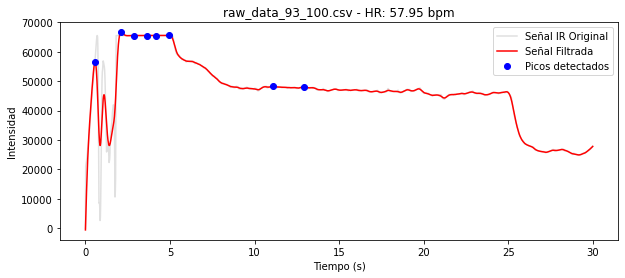

 Archivo: raw_data_93_100.csv
 Frecuencia Cardíaca Estimada: 57.95 bpm



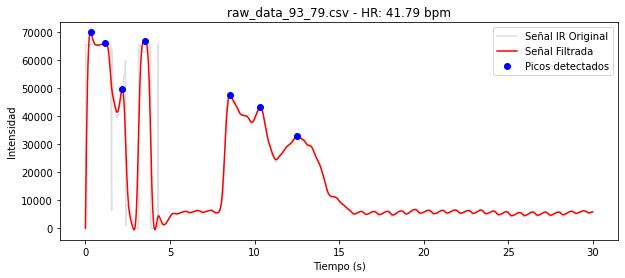

 Archivo: raw_data_93_79.csv
 Frecuencia Cardíaca Estimada: 41.79 bpm



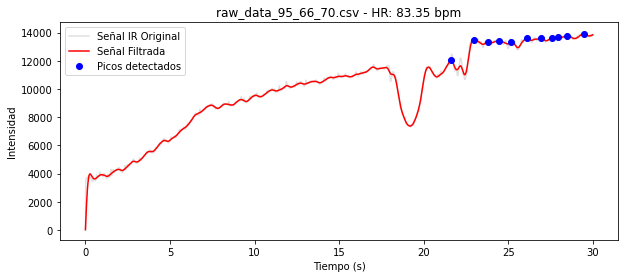

 Archivo: raw_data_95_66_70.csv
 Frecuencia Cardíaca Estimada: 83.35 bpm



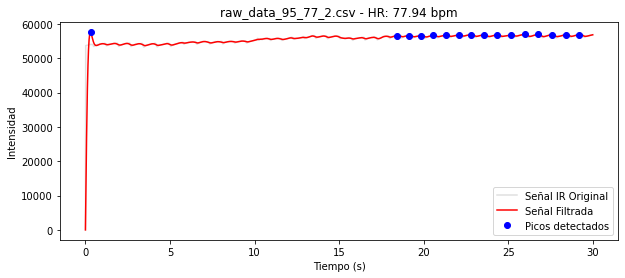

 Archivo: raw_data_95_77_2.csv
 Frecuencia Cardíaca Estimada: 77.94 bpm



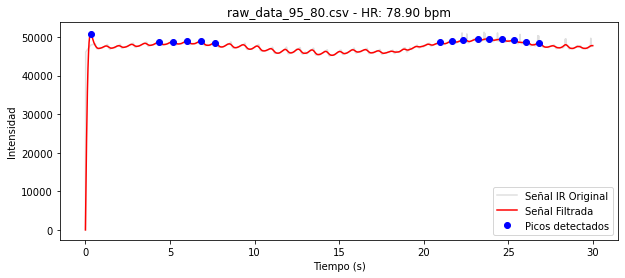

 Archivo: raw_data_95_80.csv
 Frecuencia Cardíaca Estimada: 78.90 bpm



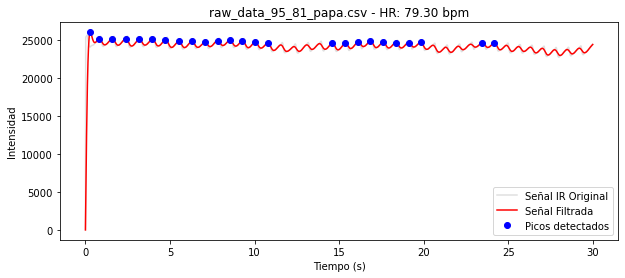

 Archivo: raw_data_95_81_papa.csv
 Frecuencia Cardíaca Estimada: 79.30 bpm



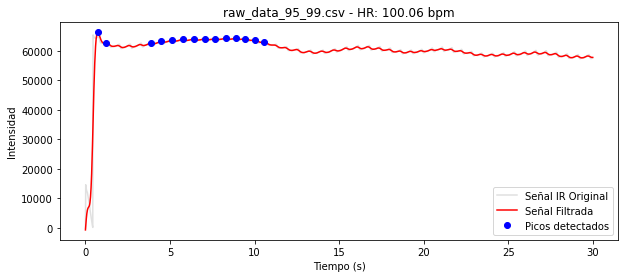

 Archivo: raw_data_95_99.csv
 Frecuencia Cardíaca Estimada: 100.06 bpm



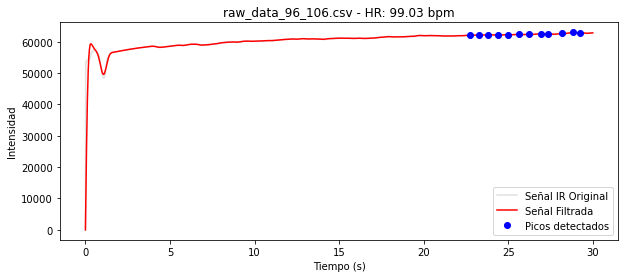

 Archivo: raw_data_96_106.csv
 Frecuencia Cardíaca Estimada: 99.03 bpm



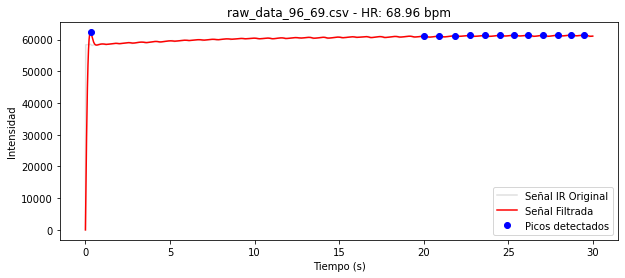

 Archivo: raw_data_96_69.csv
 Frecuencia Cardíaca Estimada: 68.96 bpm



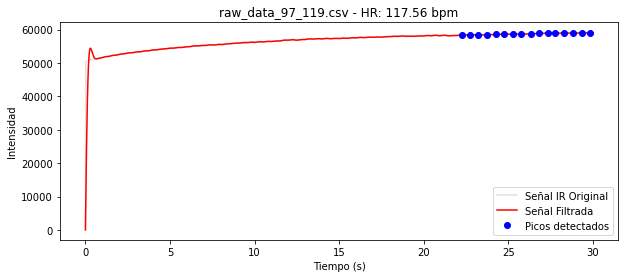

 Archivo: raw_data_97_119.csv
 Frecuencia Cardíaca Estimada: 117.56 bpm



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks, butter, filtfilt

# Función para filtrar la señal sin perder demasiada información
def filtrar_senal(senal, fs=100, fc=3.0, orden=2):
    nyquist = 0.5 * fs
    normal_fc = fc / nyquist
    b, a = butter(orden, normal_fc, btype='low', analog=False)
    return filtfilt(b, a, senal)

# Función para eliminar outliers en los intervalos RR
def filtrar_rr_intervals(rr_intervals):
    q1, q3 = np.percentile(rr_intervals, [25, 75])
    iqr = q3 - q1
    limite_inf, limite_sup = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return rr_intervals[(rr_intervals > limite_inf) & (rr_intervals < limite_sup)]

# Ruta de la carpeta con los CSV
carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"

# Procesar cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):
        ruta_csv = os.path.join(carpeta, archivo)
        
        # Cargar los datos
        df = pd.read_csv(ruta_csv, delimiter=";")
        tiempo = df['Tiempo (ms)'] / 1000  # Convertir a segundos
        senal_ir = df['IR']  

        # Filtrar la señal
        senal_filtrada = filtrar_senal(senal_ir)

        # Detectar picos ajustando height dinámicamente
        height_umbral = np.percentile(senal_filtrada, 75)  # 75% de la señal
        picos, _ = find_peaks(senal_filtrada, distance=20, height=height_umbral)  

        if len(picos) > 1:  
            tiempos_entre_picos = np.diff(tiempo[picos])  
            
            # Filtrar los RR-intervals eliminando outliers
            tiempos_entre_picos = filtrar_rr_intervals(tiempos_entre_picos)

            if len(tiempos_entre_picos) > 0:
                frecuencia_cardiaca = 60 / np.mean(tiempos_entre_picos)
            else:
                frecuencia_cardiaca = np.nan
        else:
            frecuencia_cardiaca = np.nan  

        # Graficar señal original y filtrada con picos detectados
        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, senal_ir, label="Señal IR Original", color='lightgray', alpha=0.7)
        plt.plot(tiempo, senal_filtrada, label="Señal Filtrada", color='r')
        plt.plot(tiempo[picos], senal_filtrada[picos], "bo", label="Picos detectados")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad")
        plt.title(f"{archivo} - HR: {frecuencia_cardiaca:.2f} bpm" if not np.isnan(frecuencia_cardiaca) else f"{archivo} - No se detectaron picos")
        plt.legend()
        plt.show()

        # Imprimir el resultado después de la gráfica
        if not np.isnan(frecuencia_cardiaca):
            print(f" Archivo: {archivo}")
            print(f" Frecuencia Cardíaca Estimada: {frecuencia_cardiaca:.2f} bpm\n")
        else:
            print(f" Archivo: {archivo}")
            print(" No se detectaron suficientes picos para calcular la HR.\n")


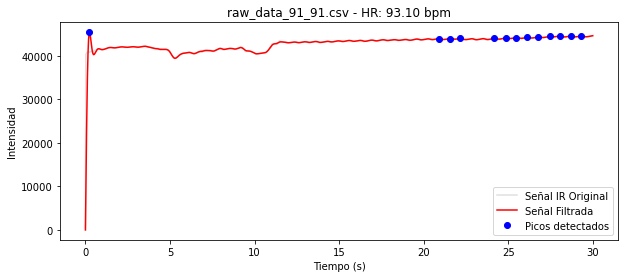

 Archivo: raw_data_91_91.csv
 Frecuencia Cardíaca Estimada: 93.10 bpm



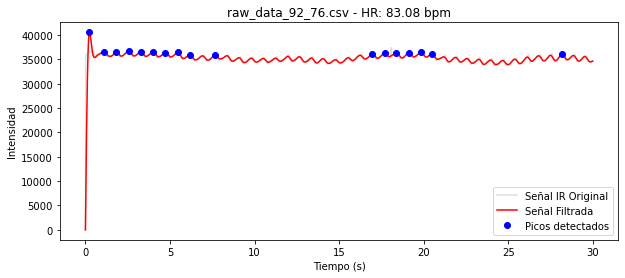

 Archivo: raw_data_92_76.csv
 Frecuencia Cardíaca Estimada: 83.08 bpm



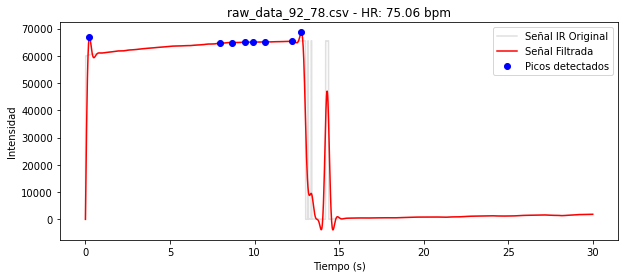

 Archivo: raw_data_92_78.csv
 Frecuencia Cardíaca Estimada: 75.06 bpm



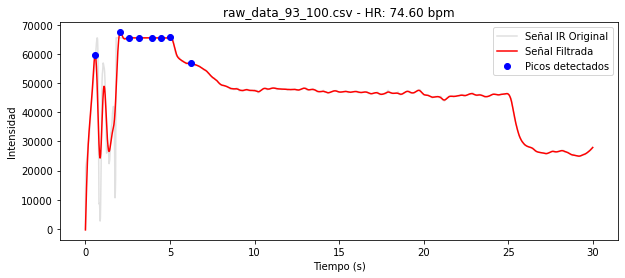

 Archivo: raw_data_93_100.csv
 Frecuencia Cardíaca Estimada: 74.60 bpm



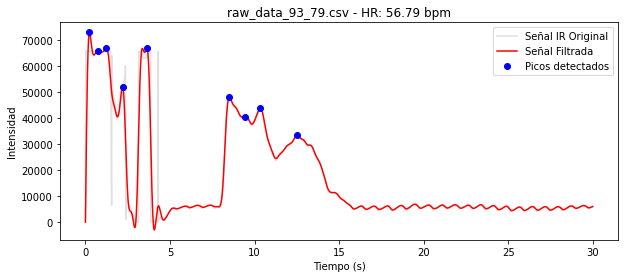

 Archivo: raw_data_93_79.csv
 Frecuencia Cardíaca Estimada: 56.79 bpm



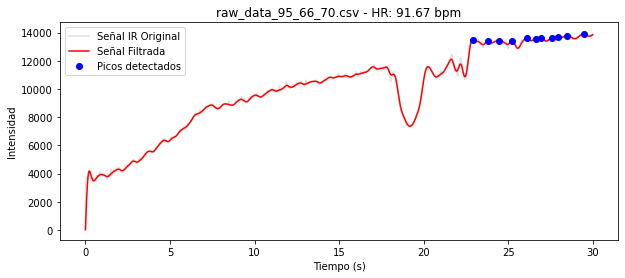

 Archivo: raw_data_95_66_70.csv
 Frecuencia Cardíaca Estimada: 91.67 bpm



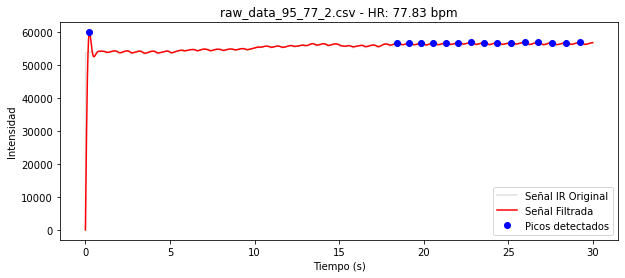

 Archivo: raw_data_95_77_2.csv
 Frecuencia Cardíaca Estimada: 77.83 bpm



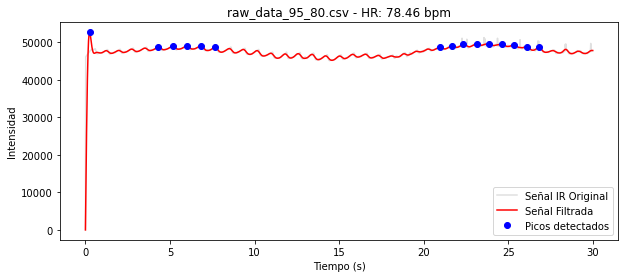

 Archivo: raw_data_95_80.csv
 Frecuencia Cardíaca Estimada: 78.46 bpm



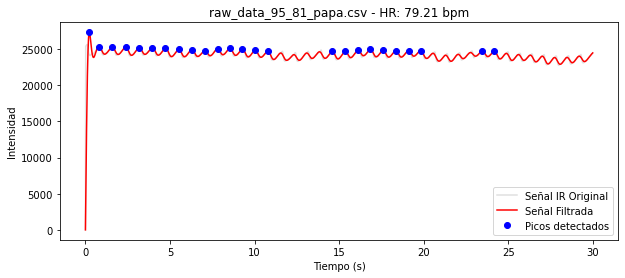

 Archivo: raw_data_95_81_papa.csv
 Frecuencia Cardíaca Estimada: 79.21 bpm



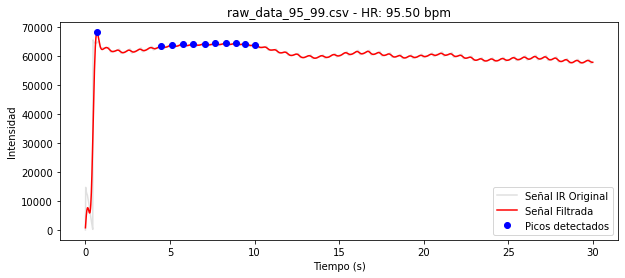

 Archivo: raw_data_95_99.csv
 Frecuencia Cardíaca Estimada: 95.50 bpm



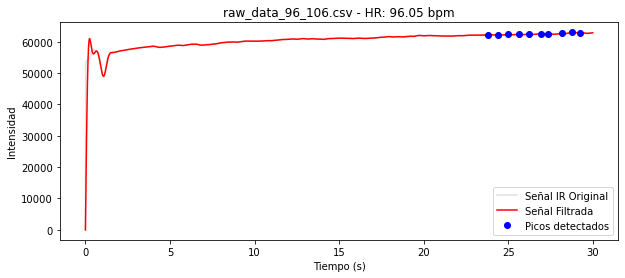

 Archivo: raw_data_96_106.csv
 Frecuencia Cardíaca Estimada: 96.05 bpm



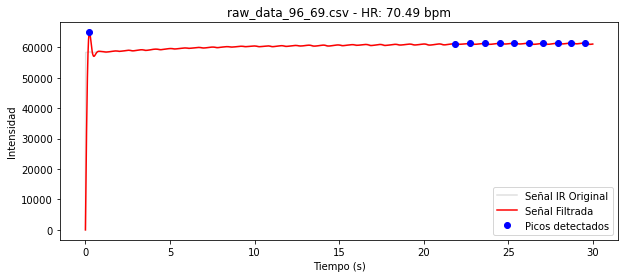

 Archivo: raw_data_96_69.csv
 Frecuencia Cardíaca Estimada: 70.49 bpm



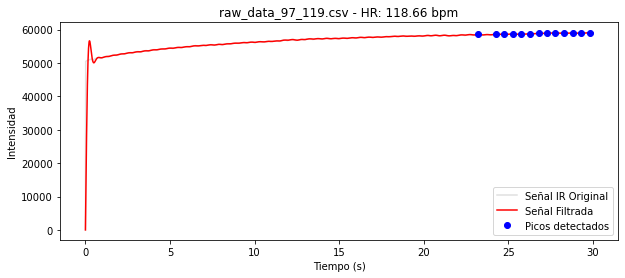

 Archivo: raw_data_97_119.csv
 Frecuencia Cardíaca Estimada: 118.66 bpm



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks, butter, filtfilt

# Función mejorada para filtrar la señal
def filtrar_senal(senal, fs=100, fc=3.5, orden=3):  # 🔹 Subimos fc a 3.5 Hz y el orden a 3
    nyquist = 0.5 * fs
    normal_fc = fc / nyquist
    b, a = butter(orden, normal_fc, btype='low', analog=False)
    return filtfilt(b, a, senal)

# Función para eliminar outliers en los intervalos RR
def filtrar_rr_intervals(rr_intervals):
    q1, q3 = np.percentile(rr_intervals, [25, 75])
    iqr = q3 - q1
    limite_inf, limite_sup = q1 - 1.2 * iqr, q3 + 1.2 * iqr  # 🔹 Más estricto en la eliminación de outliers
    return rr_intervals[(rr_intervals > limite_inf) & (rr_intervals < limite_sup)]

# Ruta de la carpeta con los CSV
carpeta = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"

# Procesar cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):
        ruta_csv = os.path.join(carpeta, archivo)
        
        # Cargar los datos
        df = pd.read_csv(ruta_csv, delimiter=";")
        tiempo = df['Tiempo (ms)'] / 1000  # Convertir a segundos
        senal_ir = df['IR']  

        # Filtrar la señal
        senal_filtrada = filtrar_senal(senal_ir)

        # Detectar picos con ajustes finos
        height_umbral = np.percentile(senal_filtrada, 80)  # 🔹 Subimos a percentil 80
        picos, _ = find_peaks(senal_filtrada, distance=18, height=height_umbral)  # 🔹 Bajamos distance a 18  

        if len(picos) > 1:  
            tiempos_entre_picos = np.diff(tiempo[picos])  
            
            # Filtrar los RR-intervals eliminando outliers
            tiempos_entre_picos = filtrar_rr_intervals(tiempos_entre_picos)

            if len(tiempos_entre_picos) > 0:
                frecuencia_cardiaca = 60 / np.mean(tiempos_entre_picos)
            else:
                frecuencia_cardiaca = np.nan
        else:
            frecuencia_cardiaca = np.nan  

        # Graficar señal original y filtrada con picos detectados
        plt.figure(figsize=(10, 4))
        plt.plot(tiempo, senal_ir, label="Señal IR Original", color='lightgray', alpha=0.7)
        plt.plot(tiempo, senal_filtrada, label="Señal Filtrada", color='r')
        plt.plot(tiempo[picos], senal_filtrada[picos], "bo", label="Picos detectados")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad")
        plt.title(f"{archivo} - HR: {frecuencia_cardiaca:.2f} bpm" if not np.isnan(frecuencia_cardiaca) else f"{archivo} - No se detectaron picos")
        plt.legend()
        plt.show()

        # Imprimir el resultado después de la gráfica
        if not np.isnan(frecuencia_cardiaca):
            print(f" Archivo: {archivo}")
            print(f" Frecuencia Cardíaca Estimada: {frecuencia_cardiaca:.2f} bpm\n")
        else:
            print(f"Archivo: {archivo}")
            print("No se detectaron suficientes picos para calcular la HR.\n")
